In [96]:
import pandas as pd
from ipywidgets import interact, widgets
import plotly.express as px
from IPython.display import display
import warnings
import folium
import csv
import math
import matplotlib.cm as cm
import matplotlib.colors as colors
from IPython.display import IFrame
import plotly.graph_objects as go
from plotly.subplots import make_subplots



In [42]:
# Group the data by "Dropoff Location" and count the occurrences
fridge_fills_count = df.groupby('Dropoff Location').size().reset_index(name='Fridge Fills')

# Normalize "Dropoff Location" column in both DataFrames
fridge_fills_count['Dropoff Location'] = fridge_fills_count['Dropoff Location']
clean_df['Dropoff Location'] = clean_df['Dropoff Location']

# Merge the counts with the clean_df DataFrame based on the "Dropoff Location" column
fridge_fills_count = fridge_fills_count.merge(clean_df[['Dropoff Location', 'Latitude', 'Longitude']], 
                                              how='left', on='Dropoff Location')

# Drop duplicate rows if any
fridge_fills_count = fridge_fills_count.drop_duplicates()


In [43]:
def create_choropleth_map(csv_file):
    # Initialize map
    m = folium.Map(location=[39.9526, -75.1652], zoom_start=13, tiles='OpenStreetMap')

    # Read CSV file and count donations for each location
    donation_counts = {}
    locations = {}
    with open(csv_file, 'r', encoding='utf-8') as file:
        reader = csv.DictReader(file)
        for row in reader:
            lat = float(row['Latitude'])
            lon = float(row['Longitude'])
            location = row['Dropoff Location']
            donation_counts[(lat, lon)] = donation_counts.get((lat, lon), 0) + 1
            locations[(lat, lon)] = location

    # Generate unique colors for each location
    colormap = cm.tab10  # Example colormap
    
    # Add markers to the map based on donation counts
    for i, ((lat, lon), count) in enumerate(donation_counts.items()):
        # Convert index to color from the colormap
        color = colors.rgb2hex(colormap(i))
    
        # Set marker size based on square root of donation count, exaggerated
        marker_size = math.sqrt(count) * 2
    
        # Add marker to the map
        popup_text = f'<div style="width:250px; height:40px;"><b>Dropoff Location:</b> {locations[(lat, lon)]}<br><b>Donations:</b> {count}</div>'
        folium.CircleMarker(location=[lat, lon], radius=marker_size, color=color, fill=True, fill_opacity=0.6,
                            popup=popup_text).add_to(m)

    # Create legend
    legend_html = '''
        <div style="position: fixed; 
                    top: 10px; right: 10px; width: 150px; height: 200px; 
                    background-color: white; border-radius: 5px; z-index:9999;
                    padding: 10px; font-size: 10px;">
            <b>Legend</b><br>
    '''
    for i, (location, _) in enumerate(donation_counts.items()):
        legend_html += f'<i style="background:{colors.rgb2hex(colormap(i))}; width: 10px; height: 10px; display:inline-block"></i> {locations[location]}<br>'
    legend_html += '</div>'
    m.get_root().html.add_child(folium.Element(legend_html))

    # Save map to HTML file
    m.save('choropleth_map.html')

# Call the function to create the choropleth map
create_choropleth_map('updated_clean_dataset.csv')

In [44]:
def create_choropleth_map(csv_file):
    # Initialize map
    m = folium.Map(location=[39.9526, -75.1652], zoom_start=13, tiles='OpenStreetMap')

    # Read CSV file and count donations for each location
    donation_counts = {}
    locations = {}
    with open(csv_file, 'r', encoding='utf-8') as file:
        reader = csv.DictReader(file)
        for row in reader:
            lat = float(row['Latitude'])
            lon = float(row['Longitude'])
            location = row['Dropoff Location']
            donation_counts[(lat, lon)] = donation_counts.get((lat, lon), 0) + 1
            locations[(lat, lon)] = location

    # Generate unique colors for each location
    colormap = cm.get_cmap('tab10', len(donation_counts))

    # Add markers to the map based on donation counts
    for i, ((lat, lon), count) in enumerate(donation_counts.items()):
        # Convert index to color from the colormap
        color = colors.rgb2hex(colormap(i))

        # Set marker size based on square root of donation count, exaggerated
        marker_size = math.sqrt(count) * 2

        # Add marker to the map
        popup_text = f'<div style="width:250px; height:40px;"><b>Dropoff Location:</b> {locations[(lat, lon)]}<br><b>Donations:</b> {count}</div>'
        folium.CircleMarker(location=[lat, lon], radius=marker_size, color=color, fill=True, fill_opacity=0.6,
                            popup=popup_text).add_to(m)

    # Create legend
    legend_html = '''
        <div style="position: fixed; 
                    top: 10px; right: 10px; width: 150px; height: 250px; 
                    background-color: white; border-radius: 5px; z-index:9999;
                    padding: 10px; font-size: 10px;">
            <b>Legend</b><br>
    '''
    for i, (location, _) in enumerate(donation_counts.items()):
        legend_html += f'<i style="background:{colors.rgb2hex(colormap(i))}; width: 10px; height: 10px; display:inline-block"></i> {locations[location]}<br>'
    legend_html += '</div>'
    m.get_root().html.add_child(folium.Element(legend_html))

    # Save map to HTML file
    html_map_path = 'choropleth_map.html'
    m.save(html_map_path)
    
    # Return the path to the HTML file
    return html_map_path

# Call the function to create the choropleth map
html_map_path = create_choropleth_map('updated_clean_dataset.csv')

# Display the map in the notebook
IFrame(html_map_path, width='100%', height=500)

C:\Users\vjmar\AppData\Local\Temp\ipykernel_28292\1121478861.py:18: MatplotlibDeprecationWarning:

The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.



### JESSICA'S HERE

In [70]:
# Define the list of locations with their start and end dates
locations = [
    {"name": "BOK FRIDGE & PANTRY", "start_date": "1/1/2023", "end_date": "12/31/2023"},
    {"name": "DISILVESTRO PLAYGROUND FRIDGE & PANTRY", "start_date": "1/1/2023", "end_date": "12/31/2023"},
    {"name": "MIFFLIN SQUARE PARK PANTRY", "start_date": "1/1/2023", "end_date": "12/31/2023"},
    {"name": "CLEVELAND", "start_date": "1/1/2023", "end_date": "6/23/2023"},
    {"name": "POINT BREEZE", "start_date": "1/1/2023", "end_date": "5/4/2023"},
    {"name": "PEOPLE’S KITCHEN FRIDGE & PANTRY", "start_date": "1/1/2023", "end_date": "12/31/2023"},
    {"name": "PORCO’S PHILLY PANTRY", "start_date": "1/1/2023", "end_date": "12/31/2023"},
    {"name": "GROWING TOGETHER GARDEN PANTRY", "start_date": "9/21/2023", "end_date": "12/31/2023"},
    {"name": "LUHV FRIDGE", "start_date": "12/9/2023", "end_date": "12/31/2023"}
]

# Function to calculate the number of days between two dates
def calculate_days(start_date, end_date):
    start = datetime.strptime(start_date, "%m/%d/%Y")
    end = datetime.strptime(end_date, "%m/%d/%Y")
    return (end - start).days

# Calculate and print the days for each location
for location in locations:
    days = calculate_days(location["start_date"], location["end_date"])
    print(f"{location['name']}: {days} days")


BOK FRIDGE & PANTRY: 364 days
DISILVESTRO PLAYGROUND FRIDGE & PANTRY: 364 days
MIFFLIN SQUARE PARK PANTRY: 364 days
CLEVELAND: 173 days
POINT BREEZE: 123 days
PEOPLE’S KITCHEN FRIDGE & PANTRY: 364 days
PORCO’S PHILLY PANTRY: 364 days
GROWING TOGETHER GARDEN PANTRY: 101 days
LUHV FRIDGE: 22 days


In [71]:
fill_location_counts = df_dates['Dropoff Location'].value_counts()

# Normalize the names by converting them to lowercase
df_dates['Dropoff Location'] = df_dates['Dropoff Location'].str.lower()

# Replace specific names with their combined versions
df_dates['Dropoff Location'].replace({'bok': 'BOK', 'porco\'s': 'Porco\'s', 'mamatee': 'Porco\'s'}, inplace=True)

# Recalculate the counts after normalization
fill_location_counts = df_dates['Dropoff Location'].value_counts()

# Dictionary mapping the normalized names to the desired names
name_mapping = {
    'ds - disilvestro': 'DISILVESTRO PLAYGROUND FRIDGE & PANTRY',
    'pk - people\'s kitchen': 'PEOPLE’S KITCHEN FRIDGE & PANTRY',
    'BOK': 'BOK FRIDGE & PANTRY',
    'mifflin': 'MIFFLIN SQUARE PARK PANTRY',
    'Porco\'s': 'PORCO’S PHILLY PANTRY',
    'pb - point breeze': 'POINT BREEZE',
    'cleveland': 'CLEVELAND',
    'growing together/reed': 'GROWING TOGETHER GARDEN PANTRY',
    'luhv': 'LUHV FRIDGE'
}

# Print the counts for each unique name with the updated location names
for fill_location, count in fill_location_counts.items():
    # Get the updated location name from the mapping
    updated_location_name = name_mapping.get(fill_location, fill_location)
    print(f"{updated_location_name}: {count} entries")


DISILVESTRO PLAYGROUND FRIDGE & PANTRY: 655 entries
PEOPLE’S KITCHEN FRIDGE & PANTRY: 634 entries
BOK FRIDGE & PANTRY: 504 entries
MIFFLIN SQUARE PARK PANTRY: 425 entries
PORCO’S PHILLY PANTRY: 346 entries
POINT BREEZE: 189 entries
CLEVELAND: 166 entries
GROWING TOGETHER GARDEN PANTRY: 115 entries
LUHV FRIDGE: 27 entries


In [72]:
# Dictionary mapping the normalized names to the desired names
name_mapping = {
    'ds - disilvestro': 'DISILVESTRO PLAYGROUND FRIDGE & PANTRY',
    'pk - people\'s kitchen': 'PEOPLE’S KITCHEN FRIDGE & PANTRY',
    'bok': 'BOK FRIDGE & PANTRY',
    'mifflin': 'MIFFLIN SQUARE PARK PANTRY',
    'porco\'s': 'PORCO’S PHILLY PANTRY',
    'pb - point breeze': 'POINT BREEZE',
    'cleveland': 'CLEVELAND',
    'growing together/reed': 'GROWING TOGETHER GARDEN PANTRY',
    'luhv': 'LUHV FRIDGE'
}

# Print the counts for each unique name with the updated location names and entries per day
for fill_location, count in fill_location_counts.items():
    # Get the updated location name from the mapping
    updated_location_name = name_mapping.get(fill_location, fill_location)
    # Find the corresponding location details
    location_details = next((loc for loc in locations if updated_location_name.lower() in loc["name"].lower()), None)
    if location_details:
        days = calculate_days(location_details["start_date"], location_details["end_date"])
        entries_per_day = count / days
        print(f"{updated_location_name}: {entries_per_day:.2f} entries per day")


DISILVESTRO PLAYGROUND FRIDGE & PANTRY: 1.80 entries per day
PEOPLE’S KITCHEN FRIDGE & PANTRY: 1.74 entries per day
BOK: 1.38 entries per day
MIFFLIN SQUARE PARK PANTRY: 1.17 entries per day
POINT BREEZE: 1.54 entries per day
CLEVELAND: 0.96 entries per day
GROWING TOGETHER GARDEN PANTRY: 1.14 entries per day
LUHV FRIDGE: 1.23 entries per day


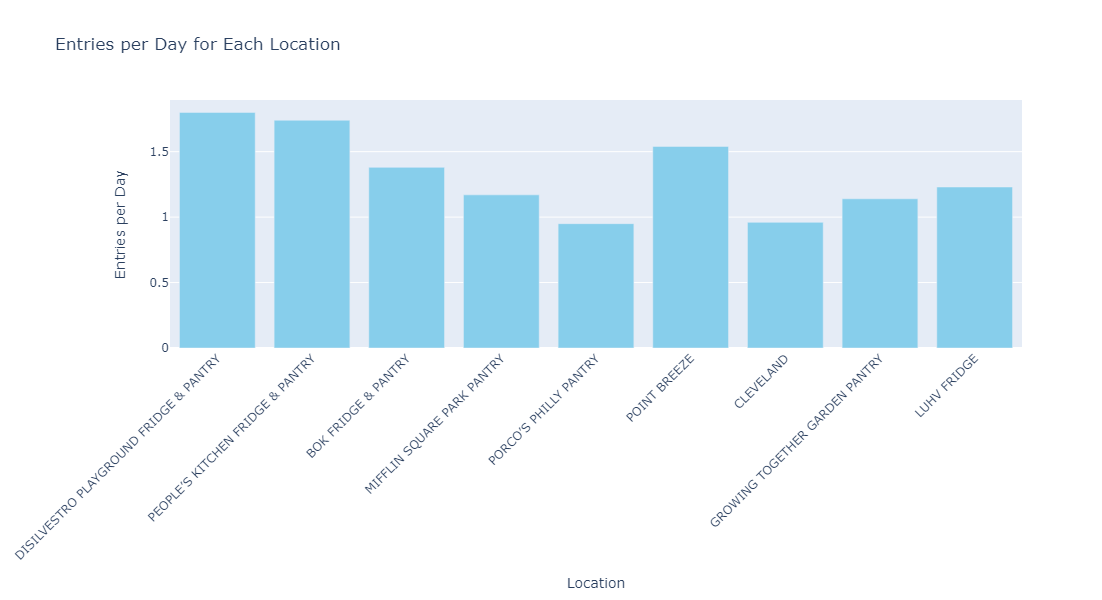

In [73]:
# Data for plotting
locations = [
    "DISILVESTRO PLAYGROUND FRIDGE & PANTRY",
    "PEOPLE’S KITCHEN FRIDGE & PANTRY",
    "BOK FRIDGE & PANTRY",
    "MIFFLIN SQUARE PARK PANTRY",
    "PORCO’S PHILLY PANTRY",
    "POINT BREEZE",
    "CLEVELAND",
    "GROWING TOGETHER GARDEN PANTRY",
    "LUHV FRIDGE"
]
entries_per_day = [
    1.80, 1.74, 1.38, 1.17, 0.95, 1.54, 0.96, 1.14, 1.23
]

# Create bar plot
fig = go.Figure([go.Bar(x=locations, y=entries_per_day, marker_color='skyblue')])
fig.update_layout(
    title='Entries per Day for Each Location',
    xaxis=dict(title='Location'),
    yaxis=dict(title='Entries per Day'),
    xaxis_tickangle=-45,
    height=600  # Adjust the height here (in pixels)
)

# Show plot
fig.show()


In [2]:
# Read data from JSON file
df = pd.read_json('project_3.fridge_fills.json')

# Convert 'Date' column to datetime
df['Date'] = pd.to_datetime(df['Date'].apply(lambda x: x['$date']))

# Drop '_id' column
df.drop('_id', axis=1, inplace=True, errors='ignore')

# Create a copy of the DataFrame with datetime 'Date' column
df_dates = df.copy()

# Define function to plot entries per month
def plot_entries_per_month(fill_type):
    if fill_type == 'All Fill Types':
        filtered_df = df_dates.copy()  
    else:
        filtered_df = df_dates[df_dates['Fill Type'] == fill_type].copy()  

    # Ensure datetime column has timezone information
    filtered_df['Date'] = filtered_df['Date'].dt.tz_localize(None)  # Remove any existing timezone information

    # Convert 'Date' column to Periods
    filtered_df.loc[:, 'YearMonth'] = filtered_df['Date'].dt.to_period('M').dt.strftime('%B')  

    monthly_counts = filtered_df.groupby('YearMonth').size().reset_index(name='Total Entries')

    # Sort monthly_counts by 'YearMonth'
    monthly_counts['YearMonth'] = pd.Categorical(monthly_counts['YearMonth'], 
                                                 categories=['January', 'February', 'March', 'April', 'May', 'June', 
                                                             'July', 'August', 'September', 'October', 'November', 'December'], 
                                                 ordered=True)
    monthly_counts = monthly_counts.sort_values('YearMonth')

    # Set figure size
    fig = px.bar(monthly_counts, x='YearMonth', y='Total Entries', 
                 labels={'YearMonth': 'Month', 'Total Entries': 'Total Entries'},
                 title=f'Total Fills per Month for {fill_type} in 2023')

    fig.update_layout(xaxis_tickangle=-45, yaxis_gridcolor='lightgrey', 
                      width=800, height=500) 
    fig.show()

# Get unique values of 'Fill Type' for dropdown menu excluding 'nan'
fill_types = df_dates['Fill Type'].dropna().unique()
fill_types = list(fill_types)
fill_types.append('All Fill Types')  

# Create interactive dropdown menu
interact(plot_entries_per_month, fill_type=widgets.Dropdown(options=fill_types, description='Fill Type:'))


interactive(children=(Dropdown(description='Fill Type:', options=('Rescued Groceries', 'Purchased Groceries', …

<function __main__.plot_entries_per_month(fill_type)>

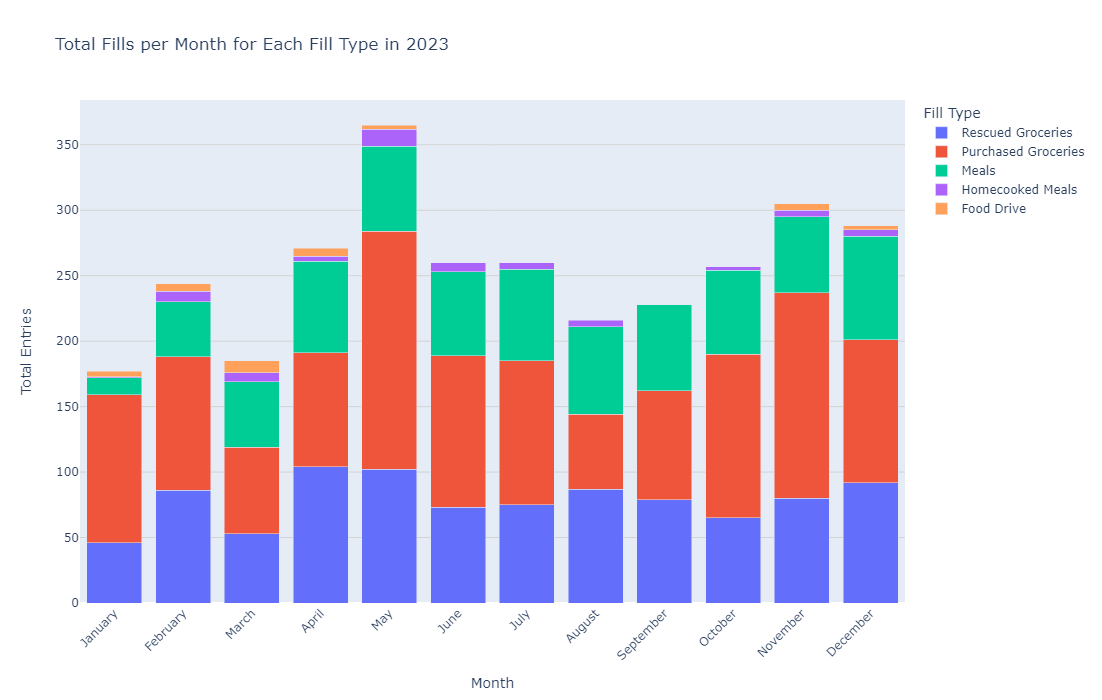

In [3]:
# Read data from JSON file
df = pd.read_json('project_3.fridge_fills.json')

# Convert 'Date' column to datetime
df['Date'] = pd.to_datetime(df['Date'].apply(lambda x: x['$date']))

# Drop '_id' column
df.drop('_id', axis=1, inplace=True, errors='ignore')

# Create a copy of the DataFrame with datetime 'Date' column
df_dates = df.copy()

# Ensure datetime column has timezone information
df_dates['Date'] = df_dates['Date'].dt.tz_localize(None)  # Remove any existing timezone information

# Convert 'Date' column to Periods
df_dates.loc[:, 'YearMonth'] = df_dates['Date'].dt.to_period('M').dt.strftime('%B')  

# Group by 'YearMonth' and 'Fill Type' to count entries for each combination
monthly_counts = df_dates.groupby(['YearMonth', 'Fill Type']).size().reset_index(name='Total Entries')

# Sort 'YearMonth' by month order
monthly_counts['YearMonth'] = pd.Categorical(monthly_counts['YearMonth'], 
                                             categories=['January', 'February', 'March', 'April', 'May', 'June', 
                                                         'July', 'August', 'September', 'October', 'November', 'December'], 
                                             ordered=True)
monthly_counts = monthly_counts.sort_values('YearMonth')

# Set figure size
fig = px.bar(monthly_counts, x='YearMonth', y='Total Entries', 
             color='Fill Type', 
             labels={'YearMonth': 'Month', 'Total Entries': 'Total Entries', 'Fill Type': 'Fill Type'},
             title='Total Fills per Month for Each Fill Type in 2023',
             barmode='stack')

fig.update_layout(xaxis_tickangle=-45, yaxis_gridcolor='lightgrey', 
                  width=1100, height=700) 

# Display the graph
display(fig)


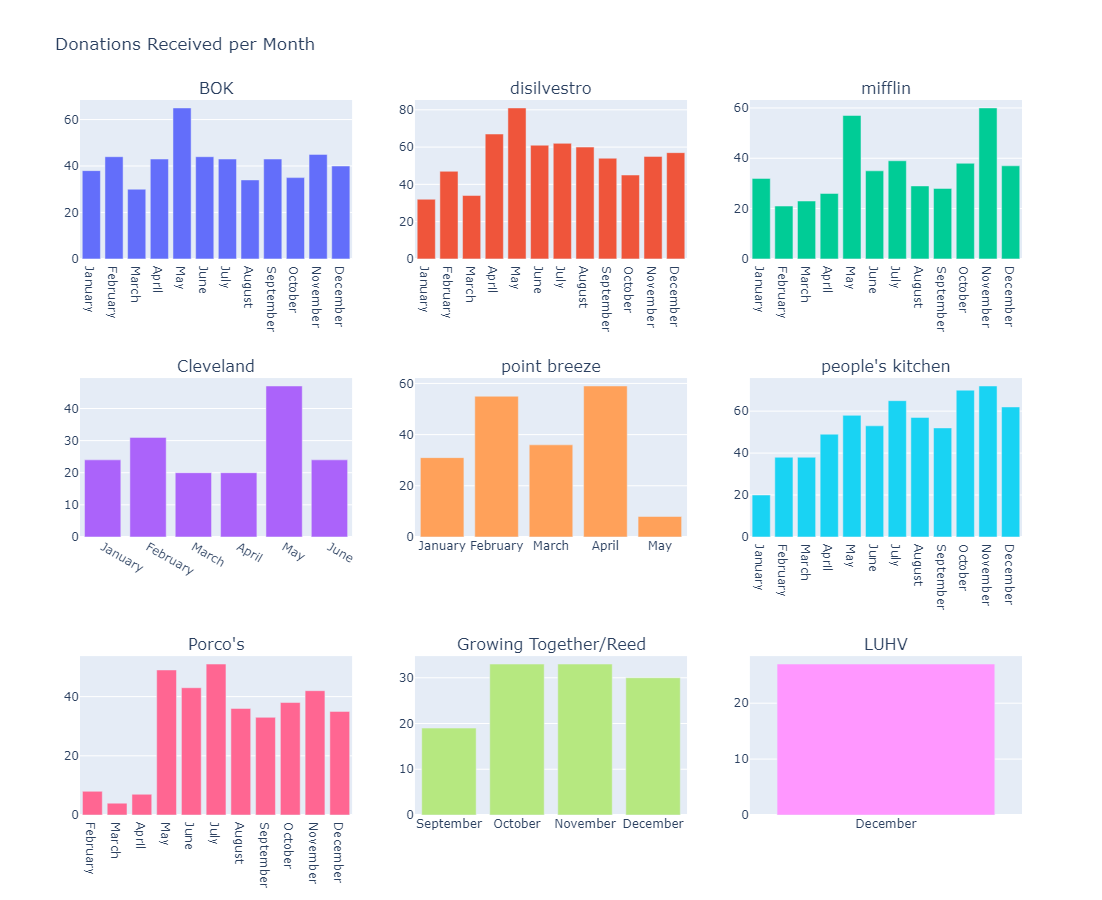

In [102]:
# Convert values to lowercase
df_dates['Dropoff Location'] = df_dates['Dropoff Location'].str.lower()

# Remove NaN values
df_dates = df_dates.dropna(subset=['Dropoff Location'])

# Define mapping dictionary
combine_mapping = {
    'bok': 'BOK',
    "pk - people's kitchen": "People's Kitchen",
    'ds - disilvestro': 'DISILVESTRO',
    'pb - point breeze': 'Point Breeze',
    'mamatee': "Porco's",
    'cleveland': 'Cleveland',
    'growing together/reed': 'Growing Together/Reed',
    "porco's": "Porco's",
    'luhv': 'LUHV'
}

# Replace values using mapping dictionary
df_dates.loc[:, 'Dropoff Location'] = df_dates['Dropoff Location'].map(combine_mapping).fillna(df_dates['Dropoff Location'])

# Create an empty list to store all subplot traces
subplot_traces = []

# Iterate through each unique location
for idx, location in enumerate(unique_locations_combined, start=1):
    # Filter DataFrame for the current location
    location_df = df_dates[df_dates['Dropoff Location'] == location].copy()

    # Localize 'Date' column to remove timezone information
    location_df['Date'] = location_df['Date'].dt.tz_localize(None)

    # Convert 'Date' column to PeriodArray/Index representation
    location_df['YearMonth'] = location_df['Date'].dt.to_period('M').dt.strftime('%B')

    # Calculate the number of donations received every month for the current location
    monthly_counts = location_df.groupby('YearMonth').size().reset_index(name='Donation Count')

    # Sort monthly_counts by month
    monthly_counts['YearMonth'] = pd.Categorical(monthly_counts['YearMonth'], categories=[
        'January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'], ordered=True)
    monthly_counts = monthly_counts.sort_values('YearMonth')

    # Create a bar trace for the current location
    trace = go.Bar(x=monthly_counts['YearMonth'], y=monthly_counts['Donation Count'], name=location)

    # Append the trace to the subplot_traces list
    subplot_traces.append(trace)

    # If the subplot_traces list contains 9 traces or it's the last iteration, create a subplot
    if len(subplot_traces) == 9 or idx == len(unique_locations_combined):
        # Create a subplot figure with a 3x3 grid
        fig = make_subplots(rows=3, cols=3, subplot_titles=[trace.name for trace in subplot_traces])

        # Add traces to the subplot figure
        for row in range(3):
            for col in range(3):
                trace_idx = row * 3 + col
                if trace_idx < len(subplot_traces):
                    fig.add_trace(subplot_traces[trace_idx], row=row+1, col=col+1)

        # Update figure layout to hide the legend
        fig.update_layout(height=900, width=900, title_text="Donations Received per Month", showlegend=False)

        # Show the subplot figure
        fig.show()

        # Reset subplot_traces list for the next set of traces
        subplot_traces = []

In [6]:
# Load clean dataset
clean_df = pd.read_csv("clean_dataset.csv")

# Dictionary mapping normalized locations to their coordinates [latitude, longitude]
locations = {
    "BOK FRIDGE & PANTRY": [39.9257126, -75.1656558],
    "DISILVESTRO PLAYGROUND FRIDGE & PANTRY": [39.9288762, -75.1730298],
    "MIFFLIN SQUARE PARK PANTRY": [39.9194993, -75.1591811],
    "CLEVELAND": [39.9316784, -75.1802706],
    "POINT BREEZE": [39.9375953, -75.1811959,],
    "PEOPLE’S KITCHEN FRIDGE & PANTRY": [39.934939, -75.163433],
    "PORCO’S PHILLY PANTRY": [39.9392245, -75.1830078],
    "GROWING TOGETHER GARDEN PANTRY": [39.9345248, -75.1898937],
    "LUHV FRIDGE": [39.9378609, -75.1775544]
}


# Function to update latitude and longitude columns based on the locations dictionary
def update_coordinates(row):
    location = row["Dropoff Location"]
    if location in locations:
        latitude, longitude = locations[location]
        row["Latitude"] = latitude
        row["Longitude"] = longitude
    return row

# Apply the update_coordinates function to each row in the DataFrame
clean_df = clean_df.apply(update_coordinates, axis=1)

# Save the updated DataFrame to CSV
clean_df.to_csv("updated_clean_dataset.csv", index=False)

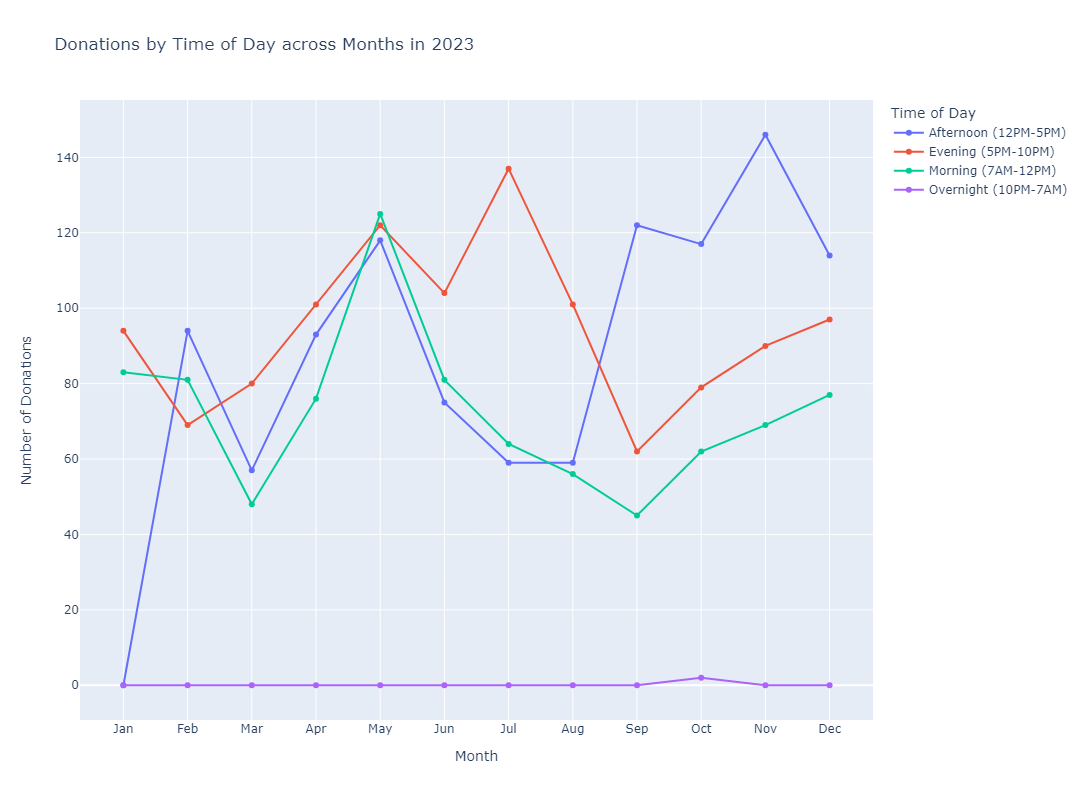

In [45]:
import plotly.graph_objects as go

# Convert the "Date" column to datetime objects
df_dates['Date'] = pd.to_datetime(df_dates['Date'])

# Group the data by month and time of day and count the number of donations for each group
monthly_donations = df_dates.groupby([df_dates['Date'].dt.month, 'Time of Day']).size().unstack(fill_value=0)

# Plot the data
fig = go.Figure()

# Add traces for each time of day
for time_of_day in monthly_donations.columns:
    fig.add_trace(go.Scatter(x=monthly_donations.index, y=monthly_donations[time_of_day], mode='lines+markers', name=time_of_day))

# Update layout
fig.update_layout(
    title='Donations by Time of Day across Months in 2023',
    xaxis=dict(
        title='Month',
        tickmode='array',
        tickvals=list(range(1, 13)),
        ticktext=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
    ),
    yaxis=dict(
        title='Number of Donations'
    ),
    legend=dict(
        title='Time of Day'
    ),
    hovermode='closest',
    height=800  
)

# Show plot
fig.show()
